# Cycle Data Prediction by Weather

***Declaration ***: The central idea and coding  is abstract  from Kevin mark ham youtube video seriese, Introduction to machine learning with scikit-learn video series. You can find link under resources section.  

***Question ***How many bike rentals would we predict if the temperature given in degrees Celsius?

***Question *** Does the scale of the features matter?

***Question *** what are effect cause by weather on bike rental scheme? 

# Libraries

In [1]:
import os,csv,io,mapsplotlib,time,folium,googlemaps,geopy,zipfile,requests,warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import mysql.connector as sql
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
warnings.simplefilter('ignore')

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

C:\Users\mrferozi\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM bike.trip_weather_short_pass_holder')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM bike.trip_weather_short_pass_holder', con=db_connection)
bikes = pd.DataFrame(data)
bikes.dtypes

﻿Date               object
Bike_rented          int64
Temp                 int64
Humidity             int64
Visibility_Miles     int64
Wind_Speed_MPH       int64
Events_num           int64
dtype: object

In [4]:
bikes.tail()

,﻿Date,Bike_rented,Temp,Humidity,Visibility_Miles,Wind_Speed_MPH,Events_num
603,27/08/2016 00:00,239,18,65,10,9,3
604,28/08/2016 00:00,289,20,65,10,9,3
605,29/08/2016 00:00,121,20,65,10,4,3
606,30/08/2016 00:00,104,17,69,10,9,3
607,31/08/2016 00:00,95,18,77,10,8,3


In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 7 columns):
﻿Date               608 non-null object
Bike_rented         608 non-null int64
Temp                608 non-null int64
Humidity            608 non-null int64
Visibility_Miles    608 non-null int64
Wind_Speed_MPH      608 non-null int64
Events_num          608 non-null int64
dtypes: int64(6), object(1)
memory usage: 33.3+ KB


## Visualizing the data

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

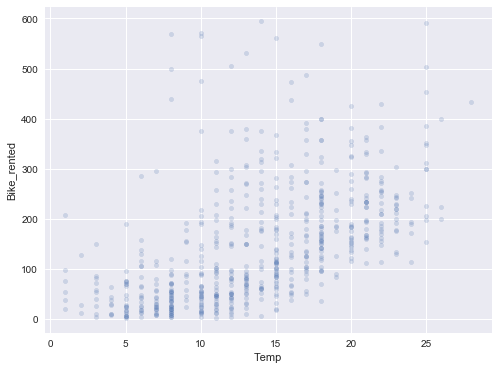

In [7]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='Temp', y='Bike_rented', alpha=0.2)

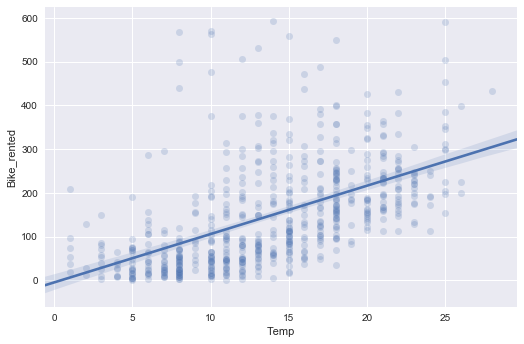

In [8]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Temp', y='Bike_rented', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

# Building a linear regression model

In [9]:
# create X and y where temp is the temprature and total is a total observation
feature_cols = ['Temp']
X = bikes[feature_cols]
y = bikes.Bike_rented

In [10]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-4.52516742109
[ 11.05603811]


## Using the model for prediction

In [12]:
# use the predict method
a = linreg.predict(20)
print (a)

[ 216.59559476]


## Conclusion:
The Model predicted that when temperature reach to 20 degrees Celsius there is a chance of ***216*** bicycle could be rented. 

# Visualizing the data (part 2)

In [13]:
# explore more features
feature_cols = ['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']

In [15]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT Events_num,Events FROM trip_weather group by  Events_num')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT Events_num,Events FROM trip_weather group by  Events_num', con=db_connection)
bikes = pd.DataFrame(data)
bikes

,Events_num,Events
0,0,Fog
1,1,"Fog, Rain"
2,2,Rain
3,4,Rain-Snow
4,5,Rain-Thunderstorm
5,6,Sunny


In [17]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM bike.trip_weather_short_pass_holder')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM bike.trip_weather_short_pass_holder', con=db_connection)
bikes = pd.DataFrame(data)
bikes.dtypes

﻿Date               object
Bike_rented          int64
Temp                 int64
Humidity             int64
Visibility_Miles     int64
Wind_Speed_MPH       int64
Events_num           int64
dtype: object

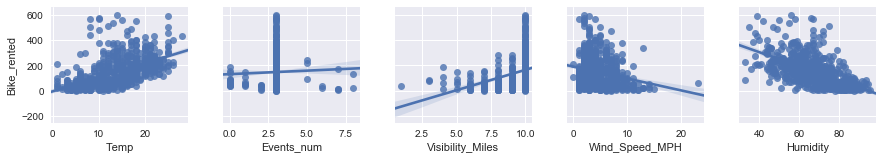

In [18]:
# explore more features
feature_cols = ['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='Bike_rented', kind='reg')

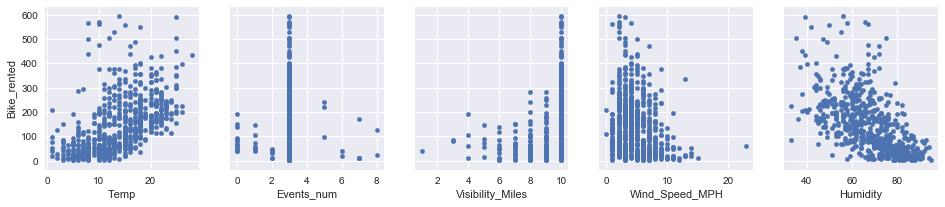

In [19]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='Bike_rented', ax=axs[index], figsize=(16, 3))

# Bicycle rentals by Events

Notably:

- A line can't capture a non-linear relationship.
- There are less rentals in winter than in spring (?)

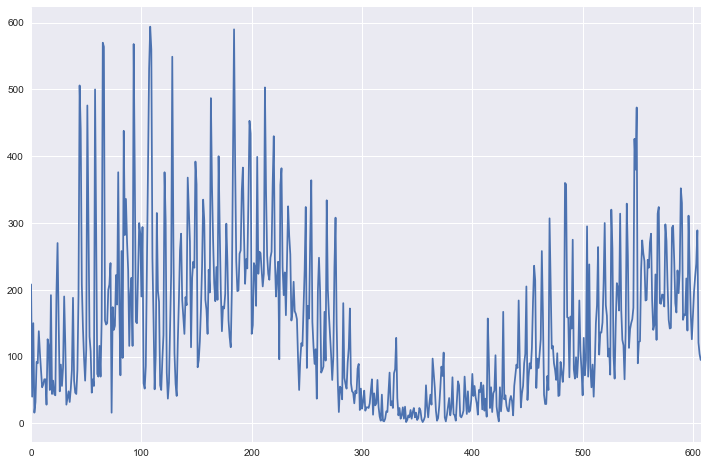

In [23]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM bike.trip_weather_short_pass_holder')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM bike.trip_weather_short_pass_holder', con=db_connection)
bikes = pd.DataFrame(data)
# line plot of rentals
bikes.Bike_rented.plot()

What does this tell us?

There are less rentals in the winter than the spring, but only because the system is experiencing **overall decay** and the winter months happen to come after the spring months.

In [24]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,Bike_rented,Temp,Humidity,Visibility_Miles,Wind_Speed_MPH,Events_num
Bike_rented,1.000000,0.536226,-0.600264,0.322374,-0.218840,0.032904
Temp,0.536226,1.000000,-0.689292,0.360015,-0.061188,0.090514
Humidity,-0.600264,-0.689292,1.000000,-0.461957,0.235063,-0.129930
Visibility_Miles,0.322374,0.360015,-0.461957,1.000000,0.032552,0.402978
Wind_Speed_MPH,-0.218840,-0.061188,0.235063,0.032552,1.000000,0.165403
Events_num,0.032904,0.090514,-0.129930,0.402978,0.165403,1.000000


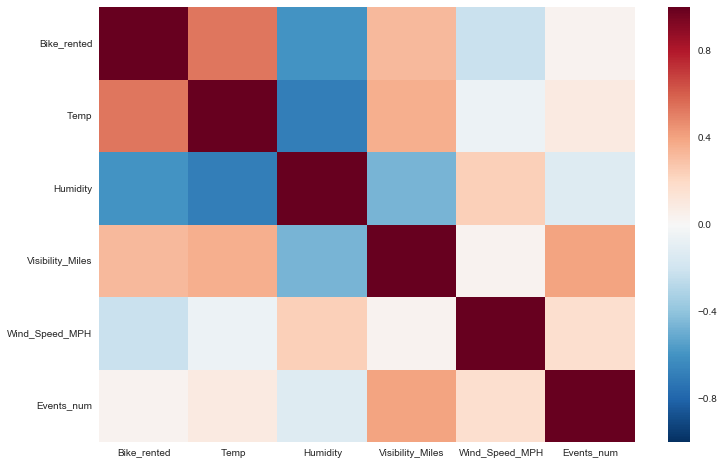

In [25]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

# Relationships between variables

In [28]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM bike.trip_weather_short_pass_holder')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM bike.trip_weather_short_pass_holder', con=db_connection)
bikes = pd.DataFrame(data)

In [206]:
# create a list of features
feature_cols = ['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']

In [29]:
# create X and y
X = bikes[feature_cols]
y = bikes.Bike_rented

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

278.386771884
[ 5.10697489 -9.1832042   8.75150045 -4.75020323 -3.44971149]


In [31]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT Events_num,Events FROM trip_weather group by  Events_num')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT Events_num,Events FROM trip_weather group by  Events_num', con=db_connection)
bikes = pd.DataFrame(data)
bikes

,Events_num,Events
0,0,Fog
1,1,"Fog, Rain"
2,2,Rain
3,4,Rain-Snow
4,5,Rain-Thunderstorm
5,6,Sunny


In [32]:
BabyDataSet = list(zip(feature_cols,linreg.coef_))
BabyDataSet

[('Temp', 5.1069748872548928),
 ('Events_num', -9.183204200513682),
 ('Visibility_Miles', 8.7515004509906884),
 ('Wind_Speed_MPH', -4.7502032304525867),
 ('Humidity', -3.4497114903317661)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Temperature** is associated with a **rental increase of 5.10 bikes**.
- Holding all other features fixed, a 1 unit increase in **'Wind_Speed_MPH** is associated with a **rental decrease of -4.75 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of -1.46 bikes**.
- Holding all other features fixed, a 1 unit increase in **Visibility_Miles** is associated with a **rental increase of 8.75 bikes**.

- Holding all other features fixed, a 1 unit increase in **Events_num** is associated with a **rental decrease of -9.18 bikes**


In [33]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [34]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


In [35]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


As we can notice that after applying some new set of predicted values. The model shows very different result. The value of MAE is the same before, but mean squared error and root mean squared error are larger than before.

# Comparing models with train/test split and RMSE

In [41]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM bike.trip_weather_short_pass_holder')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT * FROM bike.trip_weather_short_pass_holder', con=db_connection)
bikes = pd.DataFrame(data)

# Features selection

In [42]:
# create a list of features
feature_cols = ['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']

In [45]:
from sklearn.cross_validation import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.Bike_rented
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [49]:
# compare different sets of features
print (train_test_rmse(['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']))
print (train_test_rmse(['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH']))
print (train_test_rmse(['Temp', 'Events_num', 'Visibility_Miles', 'Humidity']))
print (train_test_rmse(['Temp', 'Events_num', 'Wind_Speed_MPH','Humidity']))

88.5136357915
93.0523005768
89.2940309308
89.0482052739


In [50]:
print (train_test_rmse(['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']))

88.5136357915


In [51]:
print (train_test_rmse(['Temp', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']))

88.1467776008


In [52]:
print (train_test_rmse(['Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']))

90.5728068679


In [53]:
print (train_test_rmse(['Temp']))

97.2624959522


In [54]:
print (train_test_rmse(['Temp', 'Events_num', 'Visibility_Miles',]))

95.8324582394


In [55]:
print (train_test_rmse(['Temp', 'Events_num', 'Visibility_Miles', 'Wind_Speed_MPH','Humidity']))

88.5136357915


From the RMSE result, I decided to keep above columns. 

## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which we may want to measure our regression model.

In [56]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631579,
        143.77631579,  143.77631579,  143.77631579,  143.77631

In [57]:
# compute null RMSE
print ('Predicting the mean response value:',np.sqrt(metrics.mean_squared_error(y_test, y_null)))

Predicting the mean response value: 116.160800377


## Conclusion:
***Question ***How many bike rentals would we predict if the temperature given in degrees Celsius?

- The Model predicted that when temperature reach to 20 degrees Celsius there is a chance of ***216*** bicycle could be rented. 

***Question *** Does the scale of the features matter?

-The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

***Question *** what are effect cause by weather on bike rental scheme?


- Holding all other features fixed, a 1 unit increase in **Temperature** is associated with a **rental increase of 5.10 bikes**.
- Holding all other features fixed, a 1 unit increase in **'Wind_Speed_MPH** is associated with a **rental decrease of -4.75 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of -1.46 bikes**.
- Holding all other features fixed, a 1 unit increase in **Visibility_Miles** is associated with a **rental increase of 8.75 bikes**.

- Holding all other features fixed, a 1 unit increase in **Events_num** is associated with a **rental decrease of -9.18 bikes**


- From the obtain result, after applying some new set of predicted values. The model shows very different result. The value of MAE is the same before, but mean squared error and root mean squared error are larger than before. That’s change in predicted values will effect on MSE and RMSE. The lower the RMSE is better. So, we could conclude that change in weather condition will effect on Bike Rental.

-----------------------------------------------------------------------

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)